[JWarmenhoven](https://github.com/JWarmenhoven/ISLR-python)

#mulit-Colinearity

- 다수의 독립변수가 서로 지나치게 높은 상관관계를 가지면서 회귀계수의 추정의 오류가 발생하는 문제

- 두 변수가 상관관계가 클 경우, 하나의 변수가 다른 변수의 설명력을 가져가서  표준 오차가 커지는 현상
- 즉, 높은 상관관계 경우(R>=0.9이상) 높은 분산, 민감도 증가

### X1, X2 독립 변수
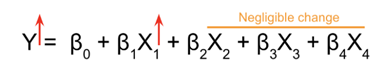

### X1, X2 독립변수가 강한 상관 관계가 있는 경우
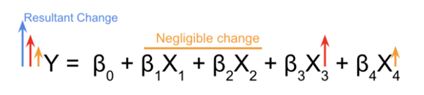

- https://medium.com/analytics-vidhya/what-is-multicollinearity-and-how-to-remove-it-413c419de2f

## 체크 방법
- seaborn pairplot  독립변수간 high collinearity  유무 체크 (r>=0.9)
- Statsmodels 분석 P값 체크
- VIF(분산팽창지수) >= 10 


## 문제 해결 방법
- 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용
- 관측값을 늘려 표본크기를 증가
- PCA를 통해 차원 축소를 수행

In [2]:
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [4]:
!ls "MyDrive/Colab Notebooks/Book/pymldg-rev/5장/input"

data_path = "MyDrive/Colab Notebooks/Book/pymldg-rev/5장/input"

bike-sharing-demand  Credit.csv  house-prices-advanced-regression-techniques


In [5]:
import pandas as pd

# Datasets available on http://www-bcf.usc.edu/~gareth/ISL/data.html
credit = pd.read_csv('{}/Credit.csv'.format(data_path), usecols=list(range(1,12)))
credit['Student2'] = credit.Student.map({'No':0, 'Yes':1})
print(credit.head())
print()
print(credit.info())
print()
print(credit.shape)

    Income  Limit  Rating  Cards  ...  Married  Ethnicity Balance Student2
0   14.891   3606     283      2  ...      Yes  Caucasian     333        0
1  106.025   6645     483      3  ...      Yes      Asian     903        1
2  104.593   7075     514      4  ...       No      Asian     580        0
3  148.924   9504     681      3  ...       No      Asian     964        0
4   55.882   4897     357      2  ...      Yes  Caucasian     331        0

[5 rows x 12 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 n

In [6]:
#One-hot encoding
test = pd.get_dummies(credit)

In [7]:
print(test.head())
print()
print(test.info())
print()
print(test.shape)

    Income  Limit  ...  Ethnicity_Asian  Ethnicity_Caucasian
0   14.891   3606  ...                0                    1
1  106.025   6645  ...                1                    0
2  104.593   7075  ...                1                    0
3  148.924   9504  ...                1                    0
4   55.882   4897  ...                0                    1

[5 rows x 17 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Income                      400 non-null    float64
 1   Limit                       400 non-null    int64  
 2   Rating                      400 non-null    int64  
 3   Cards                       400 non-null    int64  
 4   Age                         400 non-null    int64  
 5   Education                   400 non-null    int64  
 6   Balance                     400 non-null    

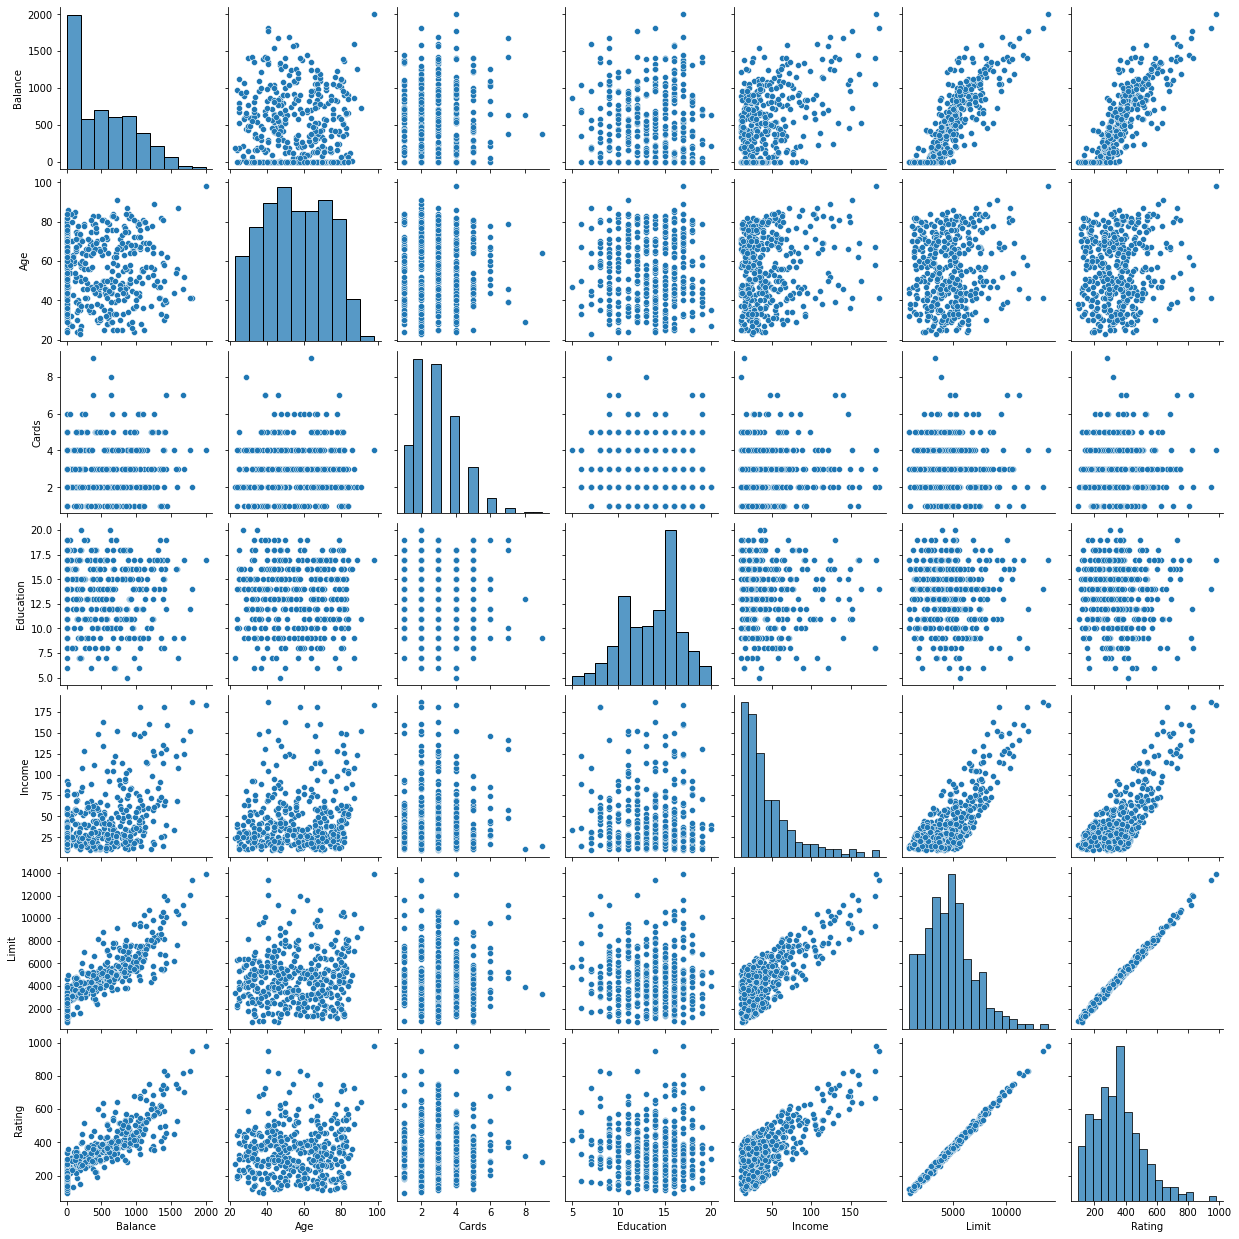

In [8]:
import seaborn as sns

sns.pairplot(credit[['Balance','Age','Cards','Education','Income','Limit','Rating']])

In [9]:
import statsmodels.formula.api as smf

est = smf.ols('Balance ~ Age + Limit', credit).fit()
print(est.summary().tables[1])
#print(est.params)

est = smf.ols('Balance ~ Rating + Limit', credit).fit()
print(est.summary().tables[1])
#print(est.params)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -173.4109     43.828     -3.957      0.000    -259.576     -87.246
Age           -2.2915      0.672     -3.407      0.001      -3.614      -0.969
Limit          0.1734      0.005     34.496      0.000       0.163       0.183
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -377.5368     45.254     -8.343      0.000    -466.505    -288.569
Rating         2.2017      0.952      2.312      0.021       0.330       4.074
Limit          0.0245      0.064      0.384      0.701      -0.101       0.150


-  p- 값은 변수가 종속 변수와 상관 관계가 없다는 귀무 가설을 검정
- 변수에 대한 p- 값이 유의 수준보다 작은 경우 표본 데이터는 전체 모집단에 대한 귀무 가설을 기각 할 수있는 충분한 증거를 제공
  - 이 변수는 통계적으로 유의하며 회귀 모델에 추가 할 가치가 있음을 의미

In [10]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     582.8
Date:                Wed, 23 Dec 2020   Prob (F-statistic):          7.57e-119
Time:                        15:28:12   Log-Likelihood:                -2745.3
No. Observations:                 400   AIC:                             5497.
Df Residuals:                     397   BIC:                             5509.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -377.5368     45.254     -8.343      0.000    -466.505    -288.569
Rating         2.2017      0.952      2.312      0.021       0.330       4.074
Limit          0.0245      0.064      0.384      0.701      -0.101       0.150
==============================================================================
Omnibus:                       23.153   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.187
Skew:                           0.394   Prob(JB):                     5.10e-09
Kurtosis:                       4.293   Cond. No.                     2.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

-  Colinearity와 Loss function의 Gradient에 대한 고찰


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

y = credit.Balance

# Regression for left plot
X = credit[['Age', 'Limit']]
regr1 = LinearRegression()
regr1.fit(scale(X.astype('float'), with_std=False), y)
print('Age/Limit\n',regr1.intercept_)
print(regr1.coef_)

# Regression for right plot
X2 = credit[['Rating', 'Limit']]
regr2 = LinearRegression()
regr2.fit(scale(X2.astype('float'), with_std=False), y)
print('\nRating/Limit\n',regr2.intercept_)
print(regr2.coef_)

Age/Limit
 520.0150000000001
[-2.29148553  0.17336497]

Rating/Limit
 520.015
[2.20167217 0.02451438]


In [12]:
import numpy as np

# Create grid coordinates for plotting
B_Age = np.linspace(regr1.coef_[0]-3, regr1.coef_[0]+3, 100)
B_Limit = np.linspace(regr1.coef_[1]-0.02, regr1.coef_[1]+0.02, 100)

B_Rating = np.linspace(regr2.coef_[0]-3, regr2.coef_[0]+3, 100)
B_Limit2 = np.linspace(regr2.coef_[1]-0.2, regr2.coef_[1]+0.2, 100)

X1, Y1 = np.meshgrid(B_Limit, B_Age, indexing='xy')
X2, Y2 = np.meshgrid(B_Limit2, B_Rating, indexing='xy')
Z1 = np.zeros((B_Age.size,B_Limit.size))
Z2 = np.zeros((B_Rating.size,B_Limit2.size))

Limit_scaled = scale(credit.Limit.astype('float'), with_std=False)
Age_scaled = scale(credit.Age.astype('float'), with_std=False)
Rating_scaled = scale(credit.Rating.astype('float'), with_std=False)

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z1):
    Z1[i,j] =((y - (regr1.intercept_ + X1[i,j]*Limit_scaled +
                    Y1[i,j]*Age_scaled))**2).sum()/1000000
    
for (i,j),v in np.ndenumerate(Z2):
    Z2[i,j] =((y - (regr2.intercept_ + X2[i,j]*Limit_scaled +
                    Y2[i,j]*Rating_scaled))**2).sum()/1000000

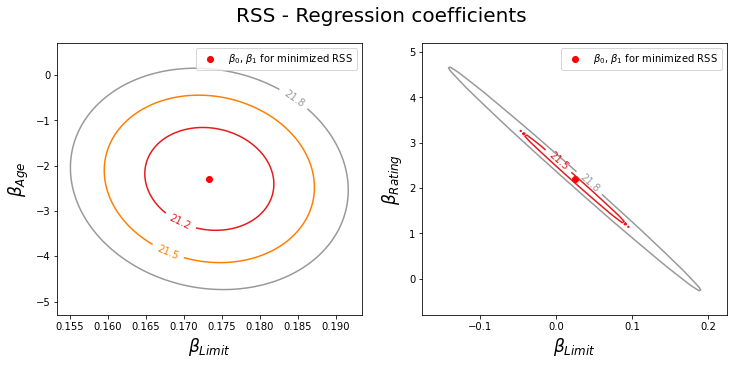

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,5))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
    
# Left plot
CS = ax1.contour(X1, Y1, Z1, cmap=plt.cm.Set1, levels=[21.25, 21.5, 21.8])
ax1.scatter(regr1.coef_[1], regr1.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax1.set_ylabel(r'$\beta_{Age}$', fontsize=17)

# Right plot
CS = ax2.contour(X2, Y2, Z2, cmap=plt.cm.Set1, levels=[21.5, 21.8])
ax2.scatter(regr2.coef_[1], regr2.coef_[0], c='r', label=min_RSS)
ax2.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax2.set_ylabel(r'$\beta_{Rating}$', fontsize=17)
ax2.set_xticks([-0.1, 0, 0.1, 0.2])

for ax in fig.axes:
    ax.set_xlabel(r'$\beta_{Limit}$', fontsize=17)
    ax.legend()

- 첫번째 plot은 gradient descent를 통해 Loss 가 최소가 될 수 있도록 fitting 될 수 있지만, 
- 두번째 plot의 경우는 최적화하는데 시간이 오래걸릴 수도 있고 fitting이 잘 안될 수도 있다.

#VIF Check

- VIF (Variance Inflation Factor) : 독립변수들에 대한 상관정도
- 하나의 독립변수가 다른 독립 변수들을 사용하여 얼마나 잘 예측될 수 있는지를 나타냄.
- R2가 증가하면 VIF (Variance Inflation Factor)도 커짐


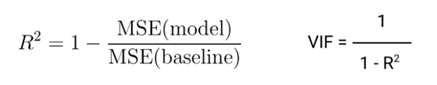

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = credit[['Balance','Age','Cards','Education','Income','Limit','Rating']]

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 

vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

     feature          VIF
0    Balance    15.731036
1        Age    10.383347
2      Cards     8.123121
3  Education    11.814555
4     Income    12.498855
5      Limit  1112.420530
6     Rating  1220.039515
